# Abalone Case Study

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
import warnings
warnings.filterwarnings('ignore')
#Imported the required libraries


In [3]:
abalone_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
abalone_df


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


The dataset contains 9 columns, all are of numeric types except the column 'Sex' which is of categorical type. Out of 9 features, 8 are independent (predictor) variables and remaining one is dependent (response) variable.

In [4]:
abalone_df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Exploratory Data Analysis

In [5]:
# Checking the dimension of dataset 
abalone_df.shape

(4177, 9)


The dataset contains 4177 rows and 9 columns including target variable

In [7]:
# Checking the type of dataset
abalone_df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Here we can observe that there are seven float type, one integer type and one object type columns are present in the given dataset. Since there is an object datatype we will convert it into numeric by using encoding method later.



In [8]:
# Checking null values in the dataframe
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no missing values in the dataset so no need to handle the missing values, we can proceed further

In [9]:
# To get good overview of the dataset
abalone_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


This gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.

From problem statement and feature discription, let's first compute the target varible of the problem ' Age' and assign it to the dataset.

Adding 1.5 to Rings to get Age i.e. Age = 1.5+Rings

In [5]:
#adding Age column in dataset
abalone_df['Age'] = abalone_df['Rings']+1.5


In [6]:
abalone_df


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


We assigned Age column to the dataset.Here Rings are the target variable. Now we have to predict the rings of each abalone which will lead us to the age of that abalone.



In [7]:
# Let's check the data type again
abalone_df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object

After assigning Age to the dataset we can observe that all the columns are of float type except the columns Sex and Rings which are of object and integer type respectively.

In [8]:
abalone_df.nunique()


Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
Age                 28
dtype: int64

In [9]:
# Checking the uniqueness of dataset
abalone_df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

This gives the unique occurrence in the target variable. As we can see from above the 'Rings' of abalone ranges from 1 to 29.

In [11]:
# List of values in the quality variable
abalone_df["Rings"].value_counts()


9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

# Description of dataset

In [12]:
# Statistical summary of dataset
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

Also the 'Sex' column is not included in the describe method it is being removed since it has object datatype.



# Data Visualisation

# Univariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='count'>

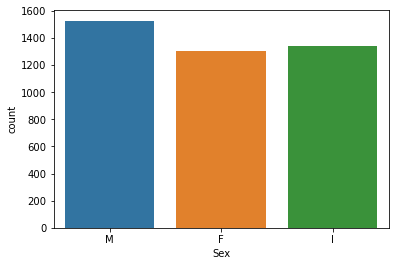

In [13]:
sns.countplot(abalone_df["Sex"])


This plot shows the counts of observations in column Sex. We can observe that the categorical column is divided into M-Male, Female-F and Infants-I. Also we can see that the data is almost balanced between Female and Infants but Male class is little bit higher than other two. Since we are treating this dataset as a regression type problem, so I am not going to balance this. But we need to use label encoding method to convert this object datatype to numerical type before stepping into our model building.




# Distribution of skewness

<AxesSubplot:xlabel='Length', ylabel='Density'>

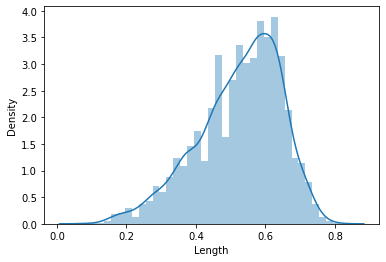

In [14]:
sns.distplot(abalone_df['Length'])


The data is not normally distributed and has right skewness.

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

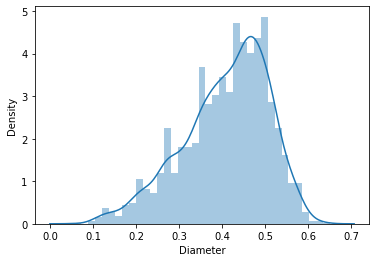

In [15]:
sns.distplot(abalone_df['Diameter'])



The data is not normally distributed and has skewness.

<AxesSubplot:xlabel='Height', ylabel='Density'>

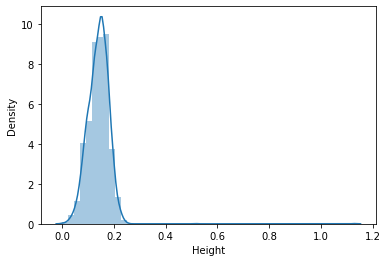

In [16]:
sns.distplot(abalone_df['Height'])


The data is not normally distribued and is highly skewed.

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

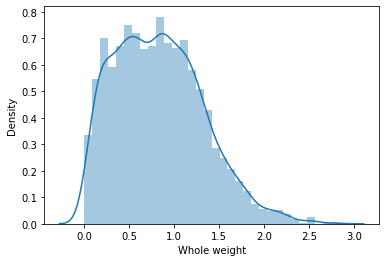

In [17]:
sns.distplot(abalone_df['Whole weight'])


The data is not normally distributed and has lest skewness.



<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

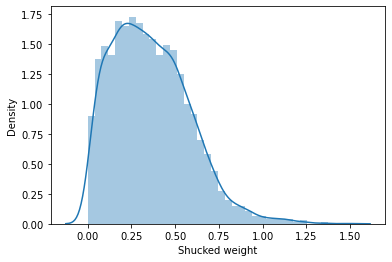

In [18]:
sns.distplot(abalone_df['Shucked weight'])


The data is not normally distributed and has skewness.



<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

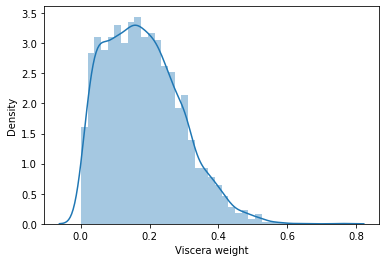

In [19]:
sns.distplot(abalone_df['Viscera weight'])


The data is not normally distributed and has skewness.



<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

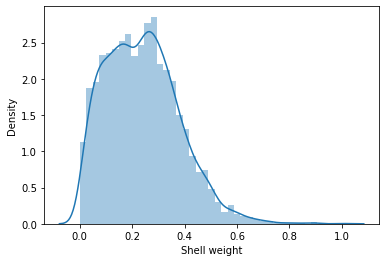

In [21]:
sns.distplot(abalone_df['Shell weight'])


The data is not normally distributed and has skewness.



<AxesSubplot:xlabel='Rings', ylabel='Density'>

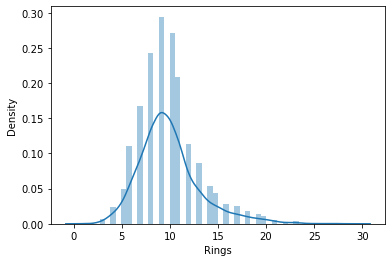

In [22]:
sns.distplot(abalone_df['Rings'])


The data is not normally distributed and has skewness.



<AxesSubplot:xlabel='Age', ylabel='Density'>

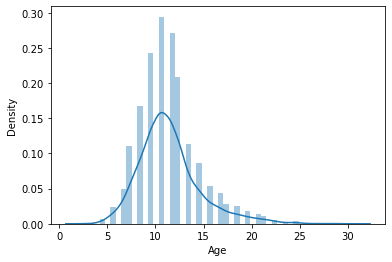

In [23]:
sns.distplot(abalone_df['Age'])


The data is not normally distributed and has skewness.

From the above distribution plot we can observe that the data is not normally distributed and has skewness in all the columns. We will treat this skewness later.



# Identifying the Outliers

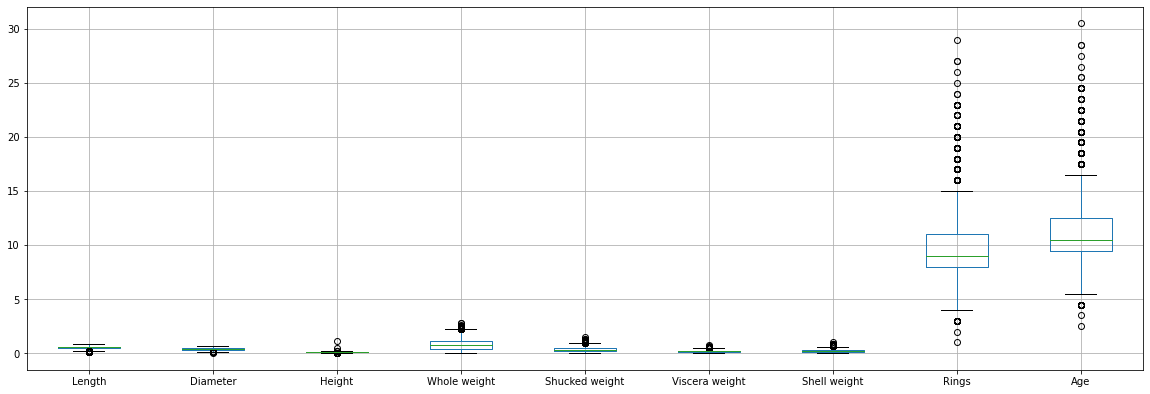

In [24]:
abalone_df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()


# Bivariate Analysis

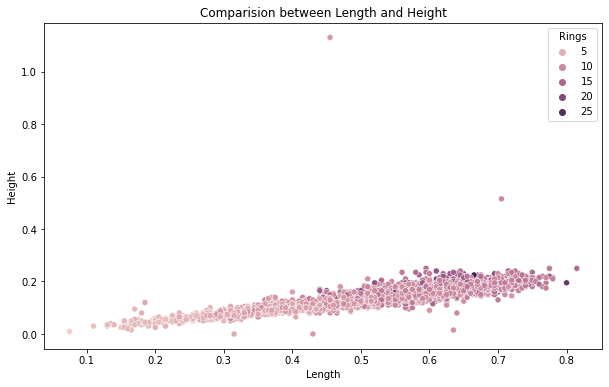

In [25]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Length and Height')
sns.scatterplot(abalone_df['Length'],abalone_df['Height'],hue=abalone_df["Rings"]);


This scatter plot shows the comparision between Length and Height on the basis of target variable 'Rings'. There is a weak linear relationship between the two columns. Also we can observe that there are outliers present.

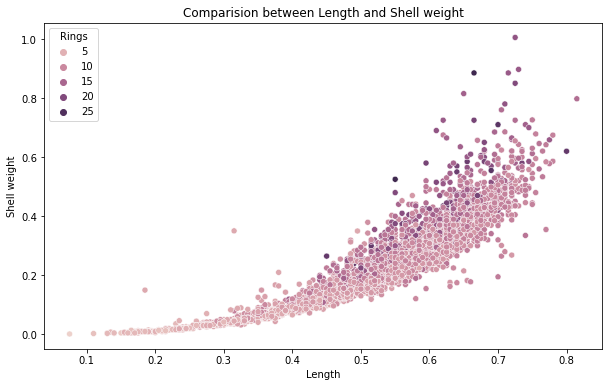

In [26]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Length and Shell weight')
sns.scatterplot(abalone_df['Length'],abalone_df['Shell weight'],hue=abalone_df["Rings"]);

This scatter plot shows the comparision between Length and Shell weight on the basis of target variable 'Rings'. There exists a moderate linear relationship between the two columns and has positive correlation. Also we can observe that there are outliers present.

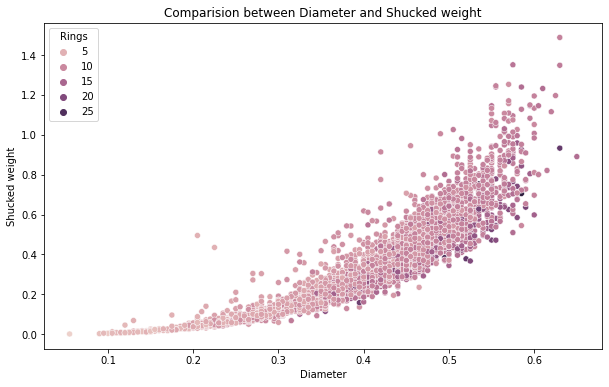

In [27]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Diameter and Shucked weight')
sns.scatterplot(abalone_df['Diameter'],abalone_df['Shucked weight'],hue=abalone_df["Rings"]);


This scatter plot shows the comparision between Diameter and Shucked weight on the basis of target variable 'Rings'. There is exists moderate linear relationship between the two columns and has positive correlation. Also we can observe that there are outliers present.

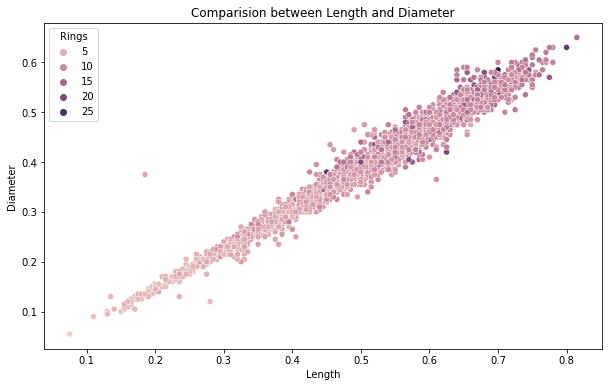

In [28]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Length and Diameter')
sns.scatterplot(abalone_df['Length'],abalone_df['Diameter'],hue=abalone_df["Rings"]);

Here we can observe that there is a strong linear relationship between the two columns and also there exists positive correlation. Also there are outliers present.



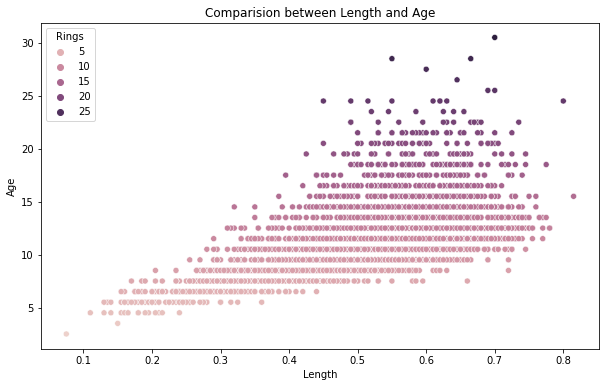

In [29]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Length and Age')
sns.scatterplot(abalone_df['Length'],abalone_df['Age'],hue=abalone_df["Rings"]);


This plot shows that there is a moderate linear relationship between the two variables and also have outliers.

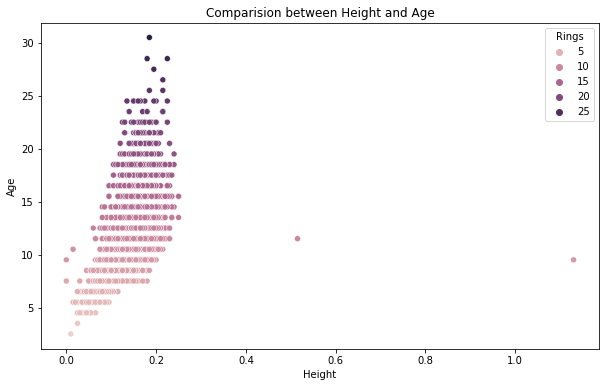

In [31]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Height and Age')
sns.scatterplot(abalone_df['Height'],abalone_df['Age'],hue=abalone_df["Rings"]);

This plot gives the comparision between Height and Age on the basis of target variable. We can observe that there is no linear relationship between the columns. Also outliers present in these columns.



# Multivariate Analysis

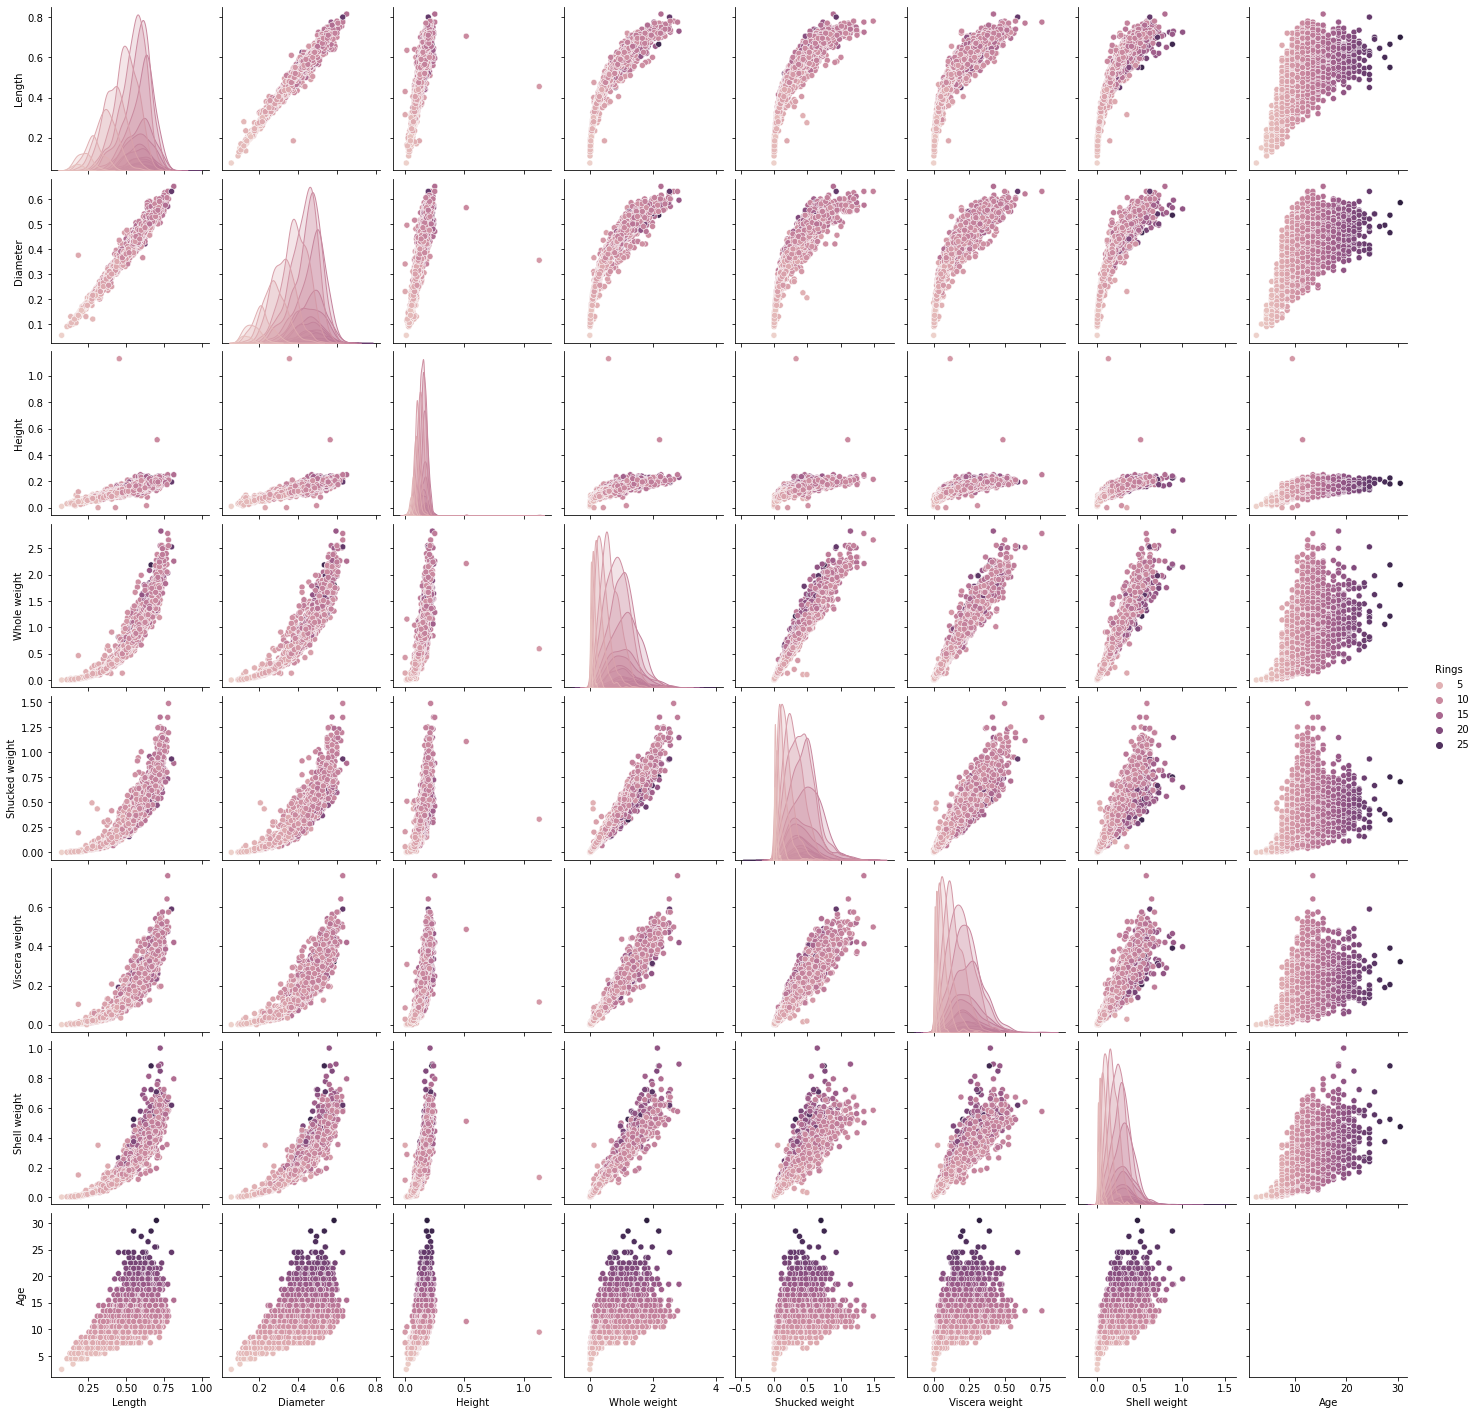

In [32]:
# Checking the pairwise relation in the dataset.
sns.pairplot(abalone_df,hue="Rings")


This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable'Rings'.

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting.
Many features are highly correlated
We can also observe there are possible outliers in the Height column.
Length and diameter have strong linear relationship.

# Correlation between the target variable and independent variables using HEAT map

In [33]:
# Creating correlation matrix
cor = abalone_df.corr()
cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map

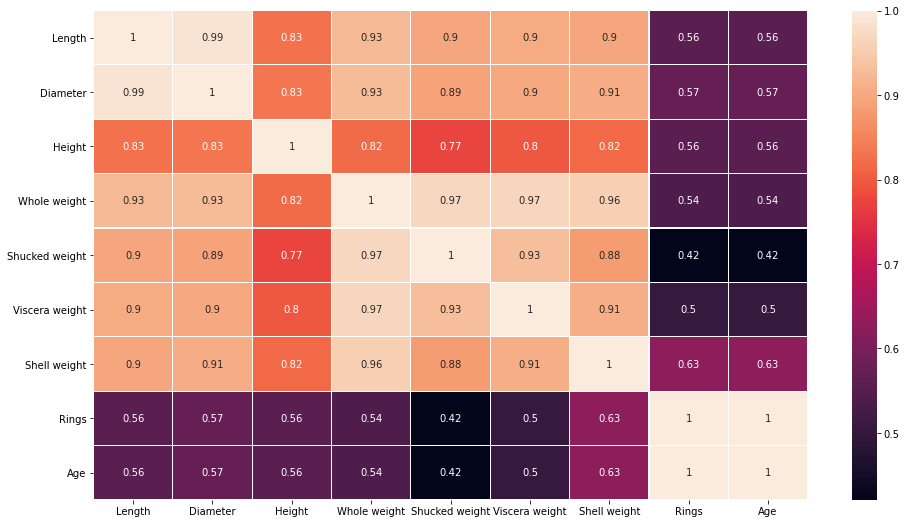

In [34]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(abalone_df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

We can observe that all the variables are positively correlated with the target variable Rings. And there is no negative correlation present.
Also all the variables are highly correlated with each other.
Since Sex is a categorical variable so it is not displayed in the heat map. All the independent features shows the multicollinearity toward each other but this is because all these variables are well related to the target variable to predict the age of the abalone.

We can use VIF value to know the multicollinearity, as we know if VIF is above 10 then it shows the high correlation berween the predicted variables which causes the multicollinearity. We can use the feature selection method to overcome by this problem but in this dataset we have less number of columns so I am retaining this problem.



# Encoding the Dataframe

In [35]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
abalone_df["Sex"]=LE.fit_transform(abalone_df["Sex"])

In [36]:
abalone_df["Sex"].unique()


array([2, 0, 1])

Here we can see the encoding of unique Sex. It has assigned as Male=2, Female=0, Infants=1.

In [37]:
abalone_df


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


Now we have converted the categorical column into numerical using label encoding.

We have already identified the outliers, now let's remove it.

# Removing the Outliers

In [40]:
variables = abalone_df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Age']]


In [41]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(variables))

z


array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

Now we have removed the outliers.

In [42]:
# Creating new dataframe
new_df = abalone_df[(z<3).all(axis=1)]
new_df


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


This is the new dataframe after removing the outliers.



In [43]:
abalone_df.shape


(4177, 10)

The original dataset contains 4177 rows and 10 columns including the column Age.



In [44]:
new_df.shape


(4027, 10)

The new dataframe contains 4027 rows and 10 columns after removing the outliers.



In [45]:
# Let's check the the data loss
data_loss = (4177-4027)/4177*100
data_loss

3.5910940866650707

This is the percentage loss of our data. Here I am not losing more data so I am removing the outliers.



# Checking skewness


In [46]:
# Checking the skewness
new_df.skew()


Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.725464
dtype: float64

Here we can observe that some columns Length, Diameter and Age are highly skewed and these columns are not in the acceptable range +0.5 or -0.5. So we need to remove it. We can ignore Rings since it is our target variable.



# Removing Skewness

In [47]:
# Defining skewed columns
features = ["Length","Diameter","Age"]


In [48]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
Parameters:
method =  'box_cox' or 'yeo-johnson'
'''


"\nParameters:\nmethod =  'box_cox' or 'yeo-johnson'\n"

In [49]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features]


,Length,Diameter,Age
0,-0.684451,-0.543379,1.672007
1,-1.411739,-1.401132,-0.981224
2,-0.046219,0.037163,-0.158989
3,-0.799651,-0.543379,0.201995
4,-1.530577,-1.474343,-0.981224
...,...,...,...
4172,0.289495,0.390420,0.536342
4173,0.545081,0.269661,0.201995
4174,0.651129,0.705921,-0.158989
4175,0.926064,0.837713,0.201995


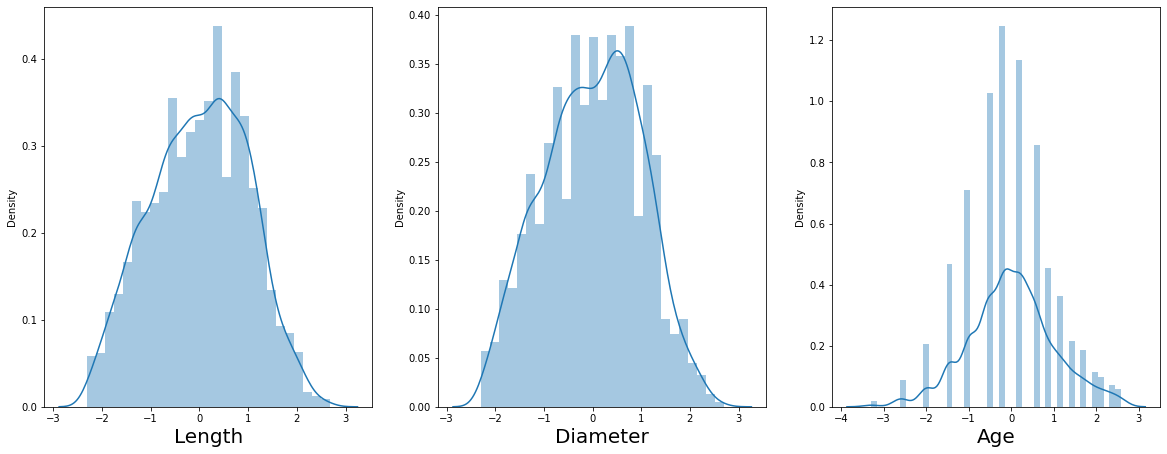

In [50]:
# After using power transformer let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in abalone_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


Here the data is almost normally distributed after power transformation compare to the previous data.



In [51]:
new_df.skew()


Sex              -0.094886
Length           -0.082985
Diameter         -0.080956
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.000891
dtype: float64

So we can see that the skewness has been removed here.



# Separating the input and output variables.

In [52]:
# Separating the independent and target variables into x and y
x=new_df.drop("Rings",axis=1)
y=new_df["Rings"]

# Standard Scalarization

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,1.159698,-0.684451,-0.543379,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659,1.672007
1,1.159698,-1.411739,-1.401132,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033,-0.981224
2,-1.285382,-0.046219,0.037163,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629,-0.158989
3,1.159698,-0.799651,-0.543379,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574,0.201995
4,-0.062842,-1.530577,-1.474343,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290,-0.981224
...,...,...,...,...,...,...,...,...,...
4022,-1.285382,0.289495,0.390420,0.732171,0.184584,0.101275,0.612382,0.143240,0.536342
4023,1.159698,0.545081,0.269661,-0.081420,0.357779,0.435609,0.375293,0.233138,0.201995
4024,1.159698,0.651129,0.705921,1.816959,0.818169,0.854737,1.081721,0.604453,-0.158989
4025,-1.285382,0.926064,0.837713,0.325376,0.639493,0.881387,0.825278,0.510647,0.201995


# Modeling -Finding best random state

In [54]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score


In [59]:
from sklearn.tree import DecisionTreeRegressor


maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = DecisionTreeRegressor()
    
    # Training the model
    mod.fit(x_train, y_train)
    
    # Predcting the value
    pred = mod.predict(x_test)
    
    # r2 score
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  1.0  on Random_state  1


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


# Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.naive_bayes import GaussianNB as NB


In [63]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))


R2_Score: 1.0


The predicted value using Random Forest Regressor is 99.9%



In [68]:
from sklearn import metrics

# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred))


3.1430934656741107


In [69]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred))


16.564102564102566


In [70]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))


4.069902033722994


# Decision Tree Regressor

In [71]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 1.0


The predicted value using Decision Tree Regressor is 100%. Here no need to check MSE, MAE and RMSE, since the predicted value is 100% so error would be zero.



# Linear Regression

In [72]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9803738334019212


The predicted value using Linear Regression is 98%.



In [73]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred))


0.2717011403811117


In [74]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred))


0.15524447209501932


In [75]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))


0.3940107512429316


# KNN Regressor

In [77]:
knn=KNN()
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9803738334019212


The predicted value using KNN regressor is 98%.



In [79]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, pred))


0.2717011403811117


In [80]:
# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, pred))


0.15524447209501932


In [81]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))


0.3940107512429316


# Support Vector Machine Regressor

In [82]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))


R2_Score: 0.9803738334019212


The predicted value using SVR is 98%.



# Ridge Regressor

In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
paramsRidge = {'alpha':[0.01, 0.1, 1,10,100], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.1, 'solver': 'sag'}


In [85]:
ridge=Ridge(alpha=0.01,random_state=0)
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
ridges=r2_score(y_test,pred)
print('R2_Score:',ridges)


R2_Score: 0.9803738334019212


The predicted value using Ridge Regressor is 98%.



# Checking the cross validation score

In [86]:
from sklearn.model_selection import cross_val_score


In [87]:
print(cross_val_score(RFR,x,y,cv=5).mean())


0.9999999865655707


In [88]:
print(cross_val_score(DTR,x,y,cv=5).mean())


1.0


In [89]:
print(cross_val_score(lr,x,y,cv=5).mean())


0.9764466442666316


In [90]:
print(cross_val_score(knn,x,y,cv=5).mean())


0.9699297965791358


In [91]:
print(cross_val_score(svr,x,y,cv=5).mean())


0.9952919739851348


In [92]:
print(cross_val_score(ridge,x,y,cv=5).mean())


0.9764468685762073


From the observation of predicted accuracy and cross validation score we can predict that Decision Tree Regressor(DTR) is the best model

In [96]:
# DecisionTreeRegressor
parameters = {'criterion':["mse", "friedman_mse", "mae", "poisson"],
              'max_depth':[2,3,4,5,6],
              'max_features':["auto", "sqrt", "log2"],
              'splitter':["best", "random"],
              'min_samples_split':[2,4,6,7]}


In [97]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)


In [98]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 7],
                         'splitter': ['best', 'random']})

In [99]:
GCV.best_params_


{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 2,
 'splitter': 'best'}

In [100]:
Final_mod = DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto', min_samples_split=2, splitter='best')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)


100.0


The final accuracy we are getting here is 100% so DecisionTreeRegressor is our best model.



# Saving the model

In [102]:
import joblib
joblib.dump(Final_mod,"Abalone.pkl")


['Abalone.pkl']